### Introduction
The purpose of this notebook is to implement an algorithm from scratch that uses gradient descent and backpropagation to estimate the matrix of a linear transformation between two vectors. This could easily just be done with the numpy library but sympy adds the visual clarity for the analytic calculations.

In [1]:
# import libaries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### Problem statement:  

"Given two vectors $\vec{u} = \begin{bmatrix}3\\2 \end{bmatrix}$, $\vec{v} = \begin{bmatrix}-2\\5 \end{bmatrix}$, what is the transformation matrix $\pmb W$ such that $\vec{u} \pmb W = \vec{v}$?"

We will start with a 2x2 matrix with randomly initialized values and use neural network methods to estimate the correct matrix.

In [2]:
# define the random initial matrix W
np.random.seed(0) # for reproducibility
W = sp.Matrix(10*np.random.random((2,2)).round(4))
W

Matrix([
[5.488, 7.152],
[6.028, 5.449]])

In [3]:
# define the vectors u and v
u = sp.Matrix([[3],[2]])
v = sp.Matrix([[-2],[5]])

Now we can perform the forward pass, which in this case is simply the result of the matrix vector product $\vec{u} \pmb{W}$. We will call the result of the forward pass the *activation* vector $\vec{a}$. Written in index notation this equation is 
$$ W_{ij}u_{j} = a_i$$ 

In [4]:
# initial forward pass to calculate a
a = W*u
a

Matrix([
[30.768],
[28.982]])

### Cost function
We can see that the activation vector $\vec{a}$ is nowhere near the desired value of $\vec{v} = \begin{bmatrix}-2\\5 \end{bmatrix}$. 
The next step is to determine an appropriate "cost" or "loss" function to measure the error between $\vec{a}$ and $\vec{v}$. The cost function we will use in this case is the mean squared error: $$ C = \frac{1}{2}\Sigma(a_i - v_i)^2 $$

In [5]:
# define the cost function MSE
def cost(a, v):
    
    C = []
    
    for x, y in zip(a, v):
        C.append(((x - y)**2))
    
    return 0.5*sum(C)

In [6]:
# calculate cost function for initial forward pass
cost(a, v)

824.439074000000

### Backpropagation

Now that we have the cost function, we can begin to calculate backpropagation. Backpropagation tells us how to update the matrix $\pmb W$ in such a way that the cost function decreases. In the case of this simple neural network with a single layer (matrix) and no activation functions, the chain rule allows us to calculate the derivative of the cost function with respect to the weights matrix as follows: 
$$ \frac{\partial C}{\partial W_{ij}} = \frac{\partial C}{\partial a_i} \frac{\partial a_k}{\partial W_{kj}} $$

Upon inspection of the forward pass equation we can see that 
$$ \frac{\partial}{\partial W_{ij}} a_i = \frac{\partial}{\partial W_{ij}}W_{ij}u_{j} = u_j $$ 

And taking the derivative of the cost function with respect to the output activation $a_i$ we get: 
$$ \frac{\partial}{\partial a_i}\frac{1}{2}\Sigma(a_i - v_i)^2 = a_i - v_i $$

Which makes the derivative of the cost function with respect to the weights matrix:
$$ \frac{\partial C}{\partial W_{ij}} = (a_i - v_i) \otimes u_j $$ This is the cost gradient we will use to update the weights matrix for each iteration of gradient descent.

In [7]:
# calculate the cost gradient matrix
cost_grad = sp.Matrix(np.outer((a - v), u))
cost_grad

Matrix([
[98.304, 65.536],
[71.946, 47.964]])

### Gradient descent

In order to update the weights matrix, the gradient descent algorithm is used. We can describe this process by the equation 
$$ W_{ij}^{n+1} = W_{ij}^{n} - l \frac{\partial C}{\partial W_{ij}}\bigg|_n $$  
where $l$ is the learning rate hyperparameter. For this application we will use a value of $l = 0.01$.

In [8]:
# define learning rate 
l = 0.01

#### First iteration

In [9]:
# compute the first iteration of gradient descent to update weight matrix
W = W - l*cost_grad
W

Matrix([
[4.50496, 6.49664],
[5.30854, 4.96936]])

Now we have an updated matrix $\pmb W$, we can compute another forward pass

In [10]:
# compute second forward pass
a = W*u
a

Matrix([
[26.50816],
[25.86434]])

Now, we compute the cost function with the new activation $\vec{a}$

In [11]:
# evaluate the cost function with new activation
cost(a,v)

624.017935110600

The new cost function is significantly lower than the original value of 824.4. The next step is to evaluate the gradient of the cost function with the new values

In [12]:
# calculate the cost gradient matrix
cost_grad = sp.Matrix(np.outer((a - v), u))
cost_grad

Matrix([
[85.52448, 57.01632],
[62.59302, 41.72868]])

#### Second iteration

In [13]:
# compute the second iteration of gradient descent
W = W - l*cost_grad
W

Matrix([
[3.6497152, 5.9264768],
[4.6826098, 4.5520732]])

In [14]:
# compute a with the new W weights (third forward pass)
a = W*u
a

Matrix([
[22.8020992],
[23.1519758]])

In [15]:
# evaluate the cost function
cost(a,v)

472.319175085213

In [16]:
# calculate the cost gradient matrix
cost_grad = sp.Matrix(np.outer((a - v), u))
cost_grad

Matrix([
[74.4062976, 49.6041984],
[54.4559274, 36.3039516]])

#### Third iteration

In [17]:
# compute the third iteration of gradient descent
W = W - l*cost_grad
W

Matrix([
[2.905652224, 5.430434816],
[4.138050526, 4.189033684]])

### Putting it all together
Now that we have calculated the first few iterations, we can see how the algorithm works and that the cost function is decreasing as expected. In the next step, we'll put it all together into a function we can loop through and let $\pmb W$ converge to the correct transformation matrix.

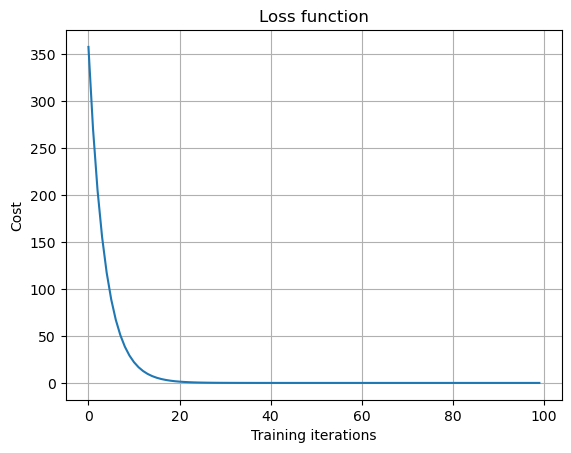

In [18]:
# define number of training iterations
epochs = 100

# make a list to store the loss for each iteration
total_loss = []

# loop through gradient descent and backpropagation
for epoch in range(epochs):
    
    # initial forward pass to calculate a
    a = W*u

    # update current loss
    total_loss.append(cost(a,v))
    
    # calculate the cost gradient matrix
    cost_grad = sp.Matrix(np.outer((a - v), u))

    # update the weights
    W = W - l*cost_grad
    
plt.plot(range(epochs), total_loss);
plt.title('Loss function')
plt.xlabel('Training iterations')
plt.ylabel('Cost')
plt.grid()
plt.show()

In [19]:
# display activation vector
a

Matrix([
[-1.99997779689555],
[ 5.00001624984287]])

We can see after just 100 iterations, the activation vector $\vec{a}$ is very close to the desired outcome $\vec{v}$.

The transformation matrix is therefore approximately:

In [20]:
# transformation matrix
W

Matrix([
[-2.07384169614595, 2.11077220256937],
[0.493695570160759, 1.75946371344051]])